In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image as image_utils
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import keras
from keras.layers import Input

Using TensorFlow backend.


In [2]:
input_tensor = Input(shape=(220,293, 3))
#include top是要不要fully connection
model=keras.applications.xception.Xception(include_top=False, weights='imagenet',
                                    input_tensor=input_tensor,
                                    pooling=None, classes=15)

#model=keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet',
#                                    input_tensor=input_tensor,
#                                    pooling=None, classes=15)

In [3]:
x = model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(output_dim=128, activation='relu')(x)
x=Dropout(p=0.2)(x)
x = Dense(output_dim=128, activation='relu')(x)


# and a logistic layer -- let's say we have 200 classes


predictions = Dense(output_dim=15,activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=15)`
  if sys.path[0] == '':


In [4]:
len(model.layers)

137

In [5]:
#如果想鎖住本來model裡面的權重
'''for layer in model.layers:
    layer.trainable = False''' 
for layer in model.layers[:120]:
   layer.trainable = False
for layer in model.layers[120:139]:
   layer.trainable = True
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
if not os.path.isdir(os.getcwd()):
    os.makedirs(os.getcwd())
model_path = os.path.join(os.getcwd(),'cat_dog_autosave_classification.h5')
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

#validation_loss訓練超過五次都沒進步，主要是避免overfitting
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range=30,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=False)
#width_shift_range=0.1,height_shift_range=0.1,

In [8]:
training_set = train_datagen.flow_from_directory('/home/jovyan/where_am_i/train',
                                                 target_size = (220, 293),
                                                 batch_size = 32,#可以改
                                                 class_mode = 'categorical')


Found 2985 images belonging to 15 classes.


In [9]:
from os import listdir
from os.path import isfile, isdir, join

# 指定要列出所有檔案的目錄
mypath = "/home/jovyan/where_am_i"

# 取得所有檔案與子目錄名稱
files = listdir(mypath)

for f in files:
  # 產生檔案的絕對路徑
  fullpath = join(mypath, f)
  if isfile(fullpath):
    print("檔案：", f)
  elif isdir(fullpath):
    print("目錄：", f)

檔案： Resnet50.submission.csv
檔案： test.ipynb
檔案： 08-Xception.ipynb
檔案： X_valid.csv
檔案： y_train.csv
檔案： pretrain.ipynb
檔案： mid_term_mapping.txt
檔案： boston.ipynb
檔案： 07-DenseNet201.ipynb
檔案： TL_vgg_whereami.ipynb
檔案： tensorflow.ipynb
檔案： 01-data_list.ipynb
檔案： 02-data_augmentation_tutorial.ipynb
檔案： Resnet50.ipynb
檔案： 04-transfer_learning_in_action.ipynb
檔案： 06-IncetionResNetV2.ipynb
檔案： keras_answer.csv
檔案： 05-ResNet50-FineTune.ipynb
檔案： X_train.csv
目錄： testset
檔案： y_valid.csv
檔案： 03-hand_tune_CNN.ipynb
檔案： img-submission.csv
目錄： train
檔案： small_last4.h5
檔案： 09-ensemble.ipynb
目錄： .ipynb_checkpoints
檔案： utils.py


In [10]:
model.fit_generator(training_set,
                    samples_per_epoch = 2985,
                    nb_epoch = 30)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=93, epochs=30)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
93/93 [==============================] - 36s 392ms/step - loss: 1.0287 - acc: 0.6755
Epoch 2/30
93/93 [==============================] - 35s 381ms/step - loss: 0.4704 - acc: 0.8473
Epoch 3/30
93/93 [==============================] - 39s 416ms/step - loss: 0.4409 - acc: 0.8646
Epoch 4/30
93/93 [==============================] - 35s 380ms/step - loss: 0.3756 - acc: 0.8772
Epoch 5/30
93/93 [==============================] - 35s 374ms/step - loss: 0.3325 - acc: 0.8950
Epoch 6/30
93/93 [==============================] - 38s 408ms/step - loss: 0.2973 - acc: 0.9103
Epoch 7/30
93/93 [==============================] - 37s 397ms/step - loss: 0.2598 - acc: 0.9225
Epoch 8/30
93/93 [==============================] - 34s 367ms/step - loss: 0.2127 - acc: 0.9242
Epoch 9/30
93/93 [==============================] - 34s 371ms/step - loss: 0.2489 - acc: 0.9239
Epoch 10/30
93/93 [==============================] - 36s 390ms/step - loss: 0.2171 - acc: 0.9333
Epoch 11/30
93/93 [====================

In [11]:
import glob
import numpy as np

All_picture=[]
path =r'/home/jovyan/where_am_i/testset'
allFiles = glob.glob(path + "/*.jpg")
testX_, test_=[], []
for picture in allFiles:
    test_image_1 = image_utils.load_img(picture, target_size=(220, 293))
    test_image_1 = image_utils.img_to_array(test_image_1)
    test_image_1 = np.expand_dims(test_image_1, axis=0)
    test_image_1 =test_image_1 /255
    new=model.predict(test_image_1)
    new=np.argmax(new)
    test_.append(new)

In [12]:
"""
CALsuburb, 9
PARoffice, 7
bedroom, 12
coast, 10
forest, 4
highway, 14
industrial, 2
insidecity, 3
kitchen, 0
livingroom, 5
mountain, 8
opencountry, 6
store, 11
street, 1
tallbuilding, 13
"""

'\nCALsuburb, 9\nPARoffice, 7\nbedroom, 12\ncoast, 10\nforest, 4\nhighway, 14\nindustrial, 2\ninsidecity, 3\nkitchen, 0\nlivingroom, 5\nmountain, 8\nopencountry, 6\nstore, 11\nstreet, 1\ntallbuilding, 13\n'

1


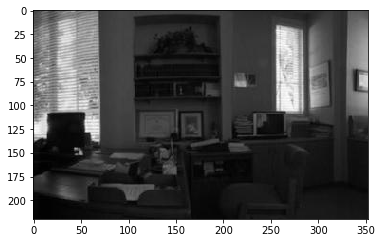

1


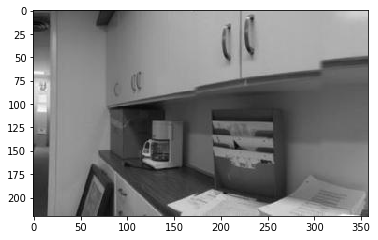

1


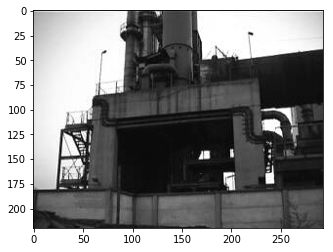

1


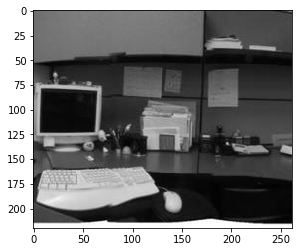

1


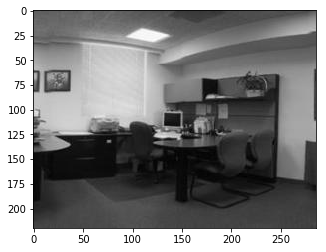

1


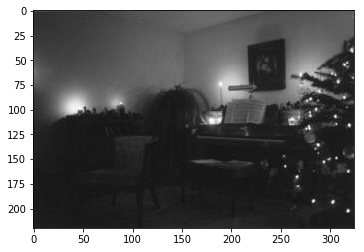

1


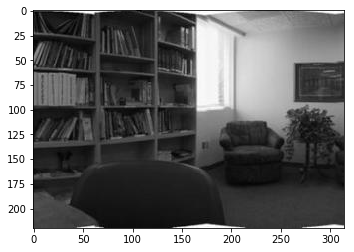

1


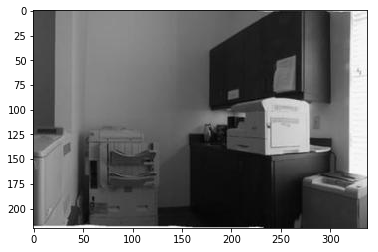

1


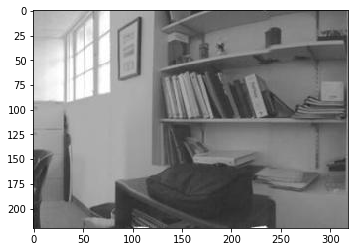

1


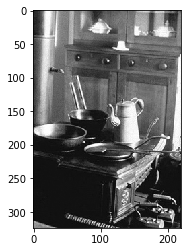

In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

ct = 0
for idid in range(len(test_)):
    if ct< 10:
        if test_[idid] == 1:   ### 0 ~ 14
            print(test_[idid])
            img = cv2.imread(allFiles[idid])
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.show()
            ct+=1

In [14]:
answer=[]
for x in test_:
    if x==13:
        x=1
    elif x==8:
        x=0
    elif x==10:
        x=8
    elif x==7:
        x=3
    elif x==9:
        x=5
    elif x==11:
        x=6
    elif x==0:
        x=9
    elif x==1:
        x=7
    elif x==5:
        x=14
    elif x==3:
        x=10
    elif x==2:
        x=12
    elif x==14:
        x=13
    elif x==6:
        x=2
    elif x==4:
        x=4
    elif x==12:
        x=11
    answer.append(x)
len(answer)

1500

In [15]:
import pandas as pd
result_csv=pd.read_csv('img-submission.csv')
result_csv.head()

,id,class
0,c117693e1cf24a5232090d1548cb11d4e5ea0df65680c4...,1
1,96baacc2e97886a998807ce197574821a6dc83c227c746...,1
2,f9bd26db23eb9b544ca78be79b11b4d1259e802885861d...,1
3,b42bcd8e6645fcc2ac40ee44b7dc8d74a77081d0aea7a1...,1
4,5bc53cef9168882f0ff67a81b3e7269f62b7fd5343d06d...,1


In [16]:
first_columns=[]
for x in allFiles:
    hi=x.split('/')[5].split('.')[0]
    first_columns.append(hi)
result_csv['id']=first_columns 
result_csv['class']=answer

In [17]:
result_csv.head()

,id,class
0,72acbd0f4ff70d9862c458894c91964bc91c5ed053f61d...,6
1,38bc001a70dfa9b84878e165a021402cd88296e898db97...,9
2,4afab9f13aabb30d757738eb1af0d7f05c36b3c1260557...,10
3,c1de3ac7f8f40886f8ef4497a802e3d94e2f1a9b981e4a...,9
4,247048ce77e38284db9538e85fabb6bd78f696c2d16fc9...,5


In [18]:
result_csv.to_csv('keras_answer.csv',index=False)